In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import geopandas as gpd

In [3]:
#Extracting data from worldometer website

url= 'https://www.worldometers.info/coronavirus/'

web_content = requests.get(url).content
data=pd.read_html(web_content)

df=data[0]

print(df.head())

ValueError: No tables found matching pattern '.+'

In [19]:
#df.dtypes

In [20]:
#manipulating the data to plot a graph
#df.dtypes
df.rename(columns={"Country,Other": "Country", "Serious,Critical": "Serious"},inplace = True)

In [21]:
#Selecting top countries with coronavirus cases

data=df.iloc[1:15]
#filling null value with 0

data=data.fillna(0)

print(data)

       #  Country  TotalCases NewCases  TotalDeaths  NewDeaths  \
1    1.0      USA     1745803        0     102107.0        0.0   
2    2.0   Brazil      414661        0      25697.0        0.0   
3    3.0   Russia      379051   +8,371       4142.0      174.0   
4    4.0    Spain      283849        0      27118.0        0.0   
5    5.0       UK      267240        0      37460.0        0.0   
6    6.0    Italy      231139        0      33072.0        0.0   
7    7.0   France      182913        0      28596.0        0.0   
8    8.0  Germany      181895        0       8533.0        0.0   
9    9.0   Turkey      159797        0       4431.0        0.0   
10  10.0    India      158613     +527       4540.0        6.0   
11  11.0     Iran      141591        0       7564.0        0.0   
12  12.0     Peru      135905        0       3983.0        0.0   
13  13.0   Canada       87519        0       6765.0        0.0   
14  14.0    Chile       82289        0        841.0        0.0   

    Total

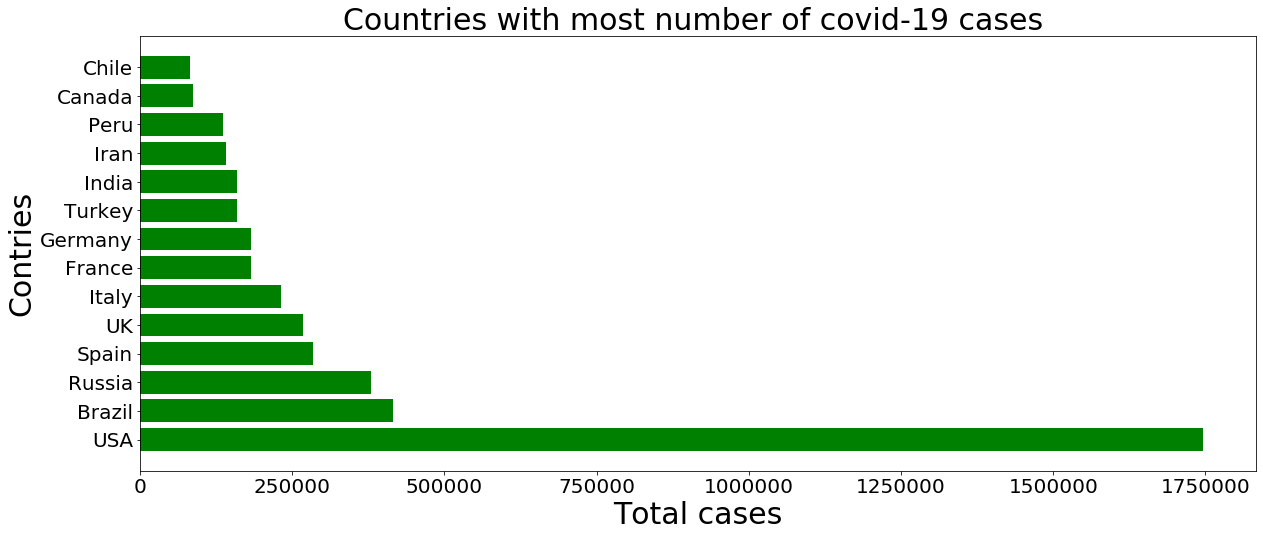

In [24]:
#plotting countries with number of total cases

import matplotlib.pyplot as plt
plt.figure (figsize=(20,8))
plt.barh(data["Country"],data["TotalCases"], color = 'green')
plt.title("Countries with most number of covid-19 cases ",fontsize =30)
plt.xlabel("Total cases", fontsize=30)
plt.ylabel("Contries", fontsize=30)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()

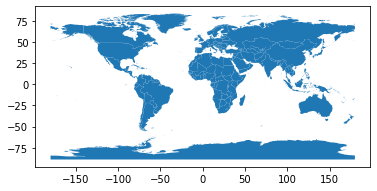

In [27]:
#Reading shape file of world countries

data_map = gpd.read_file('World_Countries__Generalized_.shp')

#Changing the name of column that we want to merge with data

data_map.rename(columns = {'COUNTRYAFF':'Country'},inplace = True)
#plotting sample of world map

data_map.plot()

In [28]:
#Changing name of some countries to match with other data

data_map['Country'].replace('United States',

                              'USA', inplace = True)

data_map['Country'].replace('United Kingdom',

                              'UK', inplace = True)

data_map['Country'].replace('Congo DRC',

                              'DRC', inplace = True)

data_map['Country'].replace('Russian Federation',

                              'Russia', inplace = True)

#merging both datasets on column country

merged = pd.merge(data_map,df, on = 'Country')

merged

,FID,COUNTRY,ISO,Country,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,#,TotalCases,...,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population
0,1,American Samoa,AS,USA,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",1.0,1745803,...,102107.0,NaN,490130.0,1153566.0,17166.0,5277.0,309.0,15875473.0,47988.0,330822304.0
1,2,United States Minor Outlying Islands,UM,USA,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...",1.0,1745803,...,102107.0,NaN,490130.0,1153566.0,17166.0,5277.0,309.0,15875473.0,47988.0,330822304.0
2,55,Puerto Rico,PR,USA,US,4.788618,0.781351,"MULTIPOLYGON (((-65.83667 18.05583, -65.84029 ...",1.0,1745803,...,102107.0,NaN,490130.0,1153566.0,17166.0,5277.0,309.0,15875473.0,47988.0,330822304.0
3,68,US Virgin Islands,VI,USA,US,1.236628,0.025685,"MULTIPOLYGON (((-64.89612 17.67666, -64.89140 ...",1.0,1745803,...,102107.0,NaN,490130.0,1153566.0,17166.0,5277.0,309.0,15875473.0,47988.0,330822304.0
4,155,United States,US,USA,US,726.106056,1116.670604,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ...",1.0,1745803,...,102107.0,NaN,490130.0,1153566.0,17166.0,5277.0,309.0,15875473.0,47988.0,330822304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,239,Mongolia,MN,Mongolia,MN,85.101505,184.432045,"POLYGON ((116.67180 46.32724, 116.58554 46.295...",158.0,161,...,NaN,NaN,43.0,118.0,11.0,49.0,NaN,13225.0,4041.0,3273095.0
224,242,Japan,JP,Japan,JP,118.053101,37.941308,"MULTIPOLYGON (((134.29938 34.70412, 134.25027 ...",39.0,16651,...,858.0,NaN,13973.0,1820.0,147.0,132.0,7.0,278642.0,2203.0,126510637.0
225,247,Russian Federation,RU,Russia,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580...",3.0,379051,...,4142.0,174.0,150993.0,223916.0,2300.0,2598.0,28.0,9701280.0,66480.0,145928826.0
226,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35...",4.0,283849,...,27118.0,NaN,196958.0,59773.0,854.0,6071.0,580.0,3556567.0,76071.0,46753147.0


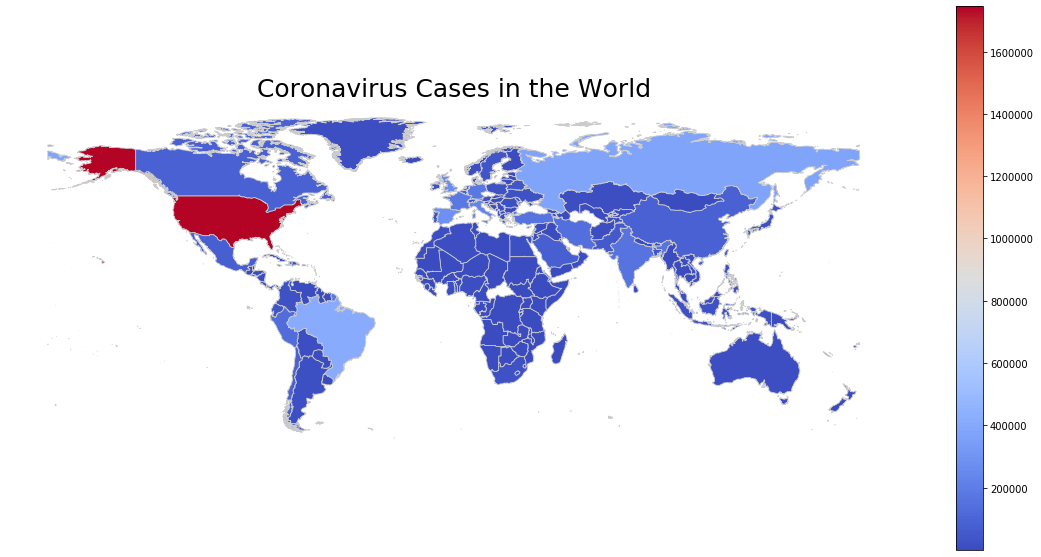

In [29]:
#plotting coronavirus cases on world map

fig, ax = plt.subplots(1, figsize=(20, 10))

ax.axis('off')
ax.set_title('Coronavirus Cases in the World', fontsize=25)

merged.plot(column = 'TotalCases', cmap='coolwarm',
           linewidth=0.8 , ax=ax , edgecolor='0.8',
           legend = True)
plt.show()